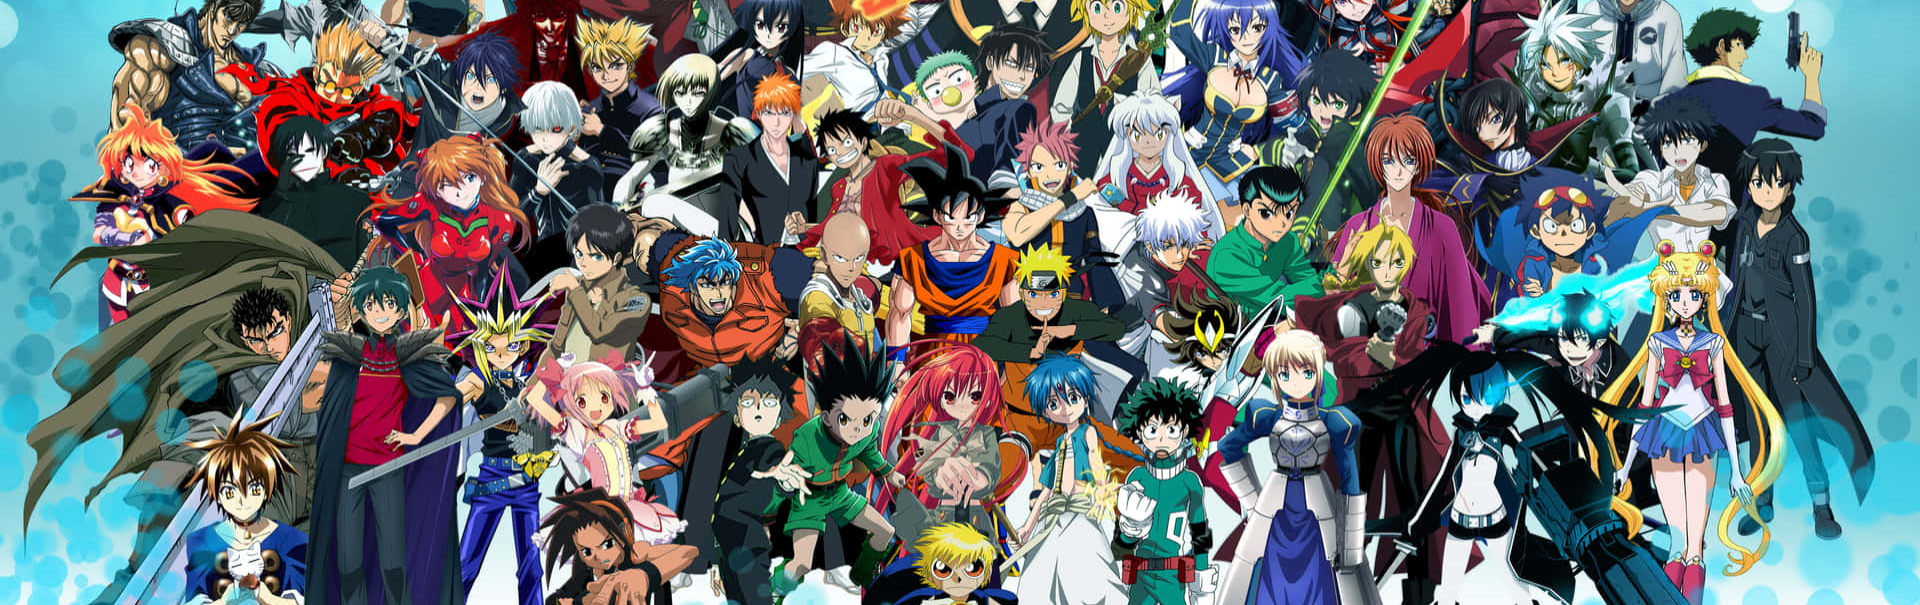

# Análise de Dados dos Animes

## Objetivo

Realizar a análise exploratória de dados (EDA), utilizando
ferramentas estatísticas e computacionais para extrair insights de um conjunto de dados real. O trabalho visa a aplicacão prática de técnicas de
visualização, estatísticas descritivas e análise gráfica.

## Discentes

1. Erich Johann Costa de Carvalho
2. Erick Andrade Borba
3. Milena Caroline da Silva Soares
4. Sarah Stephany da Cruz Souza Campos

## Conjunto de dados

O conjunto de dados escolhido para esse trabalho é um levantamento dos animes até 2022 cujo conteúdo foi extraído do MyAnimeList e Anime Background.
Possui 21460 linhas e 28 colunas.

**Disponível em:** https://www.kaggle.com/datasets/harits/anime-database-2022

In [ ]:
# Importando bibliotecas necessárias para tratamento e visualização dos dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Análise Exploratória de Dados
Conhecendo os dados da base

In [ ]:
df = pd.read_csv('Anime.csv')
df.head()

ID                             Title  \
0  16498                Shingeki no Kyojin   
1   1535                        Death Note   
2   5114  Fullmetal Alchemist: Brotherhood   
3  30276                     One Punch Man   
4  11757                  Sword Art Online   

                                            Synonyms  \
0                                           AoT, SnK   
1                                                 DN   
2  Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                  One Punch-Man, One-Punch Man, OPM   
4                                         S.A.O, SAO   

                     Japanese                          English  \
0                       進撃の巨人                  Attack on Titan   
1                       デスノート                       Death Note   
2  鋼の錬金術師 FULLMETAL ALCHEMIST  Fullmetal Alchemist Brotherhood   
3                      ワンパンマン                    One Punch Man   
4                ソードアート・オンライン                 Sword Art Online   

                                            Synopsis Type  Episodes  \
0  Centuries ago, mankind was slaughtered to near...   TV      25.0   
1  Brutal murders, petty thefts, and senseless vi...   TV      37.0   
2  After a horrific alchemy experiment goes wrong...   TV      64.0   
3  The seemingly unimpressive Saitama has a rathe...   TV      12.0   
4  Ever since the release of the innovative Nerve...   TV      25.0   

            Status  Start_Aired  ...                    Themes Demographics  \
0  Finished Airing  Apr 7, 2013  ...  Gore, Military, Survival      Shounen   
1  Finished Airing  Oct 4, 2006  ...             Psychological      Shounen   
2  Finished Airing  Apr 5, 2009  ...                  Military      Shounen   
3  Finished Airing  Oct 5, 2015  ...       Parody, Super Power       Seinen   
4  Finished Airing  Jul 8, 2012  ...  Love Polygon, Video Game      Unknown   

  Duration_Minutes                          Rating  Score Scored_Users  \
0             24.0  R - 17+ (violence & profanity)  8.531     519803.0   
1             23.0  R - 17+ (violence & profanity)  8.621     485487.0   
2             24.0  R - 17+ (violence & profanity)  9.131     900398.0   
3             24.0  R - 17+ (violence & profanity)  8.511      19066.0   
4             23.0       PG-13 - Teens 13 or older  7.201     990254.0   

    Ranked Popularity  Members Favorites  
0   1002.0          1  3524109    155695  
1    732.0          2  3504535    159701  
2     12.0          3  2978455    207772  
3   1112.0          4  2879907     59651  
4  29562.0          5  2813565     64997  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

In [ ]:
df.isnull().sum()

ID                     0
Title                  0
Synonyms               0
Japanese               0
English                0
Synopsis               0
Type                   0
Episodes             547
Status                 0
Start_Aired            0
End_Aired              0
Premiered              0
Broadcast              0
Producers              0
Licensors              0
Studios                0
Source                 0
Genres                 0
Themes                 0
Demographics           0
Duration_Minutes     599
Rating               545
Score               6898
Scored_Users        6898
Ranked              1924
Popularity             0
Members                0
Favorites              0
dtype: int64

In [ ]:
# Estatísticas descritivas antes do tratamento
df.describe()

ID      Episodes  Duration_Minutes         Score  \
count  21460.000000  20913.000000      20861.000000  14562.000000   
mean   26458.575582     13.272892         23.934135      6.421724   
std    17100.477121     48.792326         24.676538      0.910469   
min        1.000000      1.000000          1.000000      1.841000   
25%     8454.750000      1.000000          5.000000      5.791000   
50%    31004.500000      2.000000         22.000000      6.431000   
75%    40495.250000     12.000000         26.000000      7.081000   
max    53094.000000   3057.000000        168.000000      9.131000   

        Scored_Users         Ranked    Popularity       Members      Favorites  
count   14562.000000   19536.000000  21460.000000  2.146000e+04   21460.000000  
mean    26507.173809   97795.212019  10743.103681  3.926596e+04     462.214865  
std     84989.501599   56485.384273   6204.685188  1.566359e+05    4411.931536  
min       101.000000      12.000000      1.000000  6.000000e+00       0.000000  
25%       418.000000   48879.500000   5369.750000  2.910000e+02       0.000000  
50%      1876.500000   97777.000000  10741.500000  1.582500e+03       2.000000  
75%     11406.500000  146714.500000  16119.250000  1.158550e+04      23.000000  
max    997243.000000  195632.000000  21490.000000  3.524109e+06  207772.000000

## Tratamento de Dados

In [ ]:
# Eliminando duplicadas
df.drop_duplicates()

ID                                       Title  \
0      16498                          Shingeki no Kyojin   
1       1535                                  Death Note   
2       5114            Fullmetal Alchemist: Brotherhood   
3      30276                               One Punch Man   
4      11757                            Sword Art Online   
...      ...                                         ...   
21455  45064    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo   
21456  45065  Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2   
21457  45059                     Yongzhe Chuang Mo Cheng   
21458  45063             Yu Shen Chuan: Wangzhe Shaonian   
21459  45061                               Konglong Wang   

                                                Synonyms  \
0                                               AoT, SnK   
1                                                     DN   
2      Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                      One Punch-Man, One-Punch Man, OPM   
4                                             S.A.O, SAO   
...                                                  ...   
21455                                            Unknown   
21456                                            Unknown   
21457                                            Unknown   
21458                                            Unknown   
21459                                            Unknown   

                         Japanese                           English  \
0                           進撃の巨人                   Attack on Titan   
1                           デスノート                        Death Note   
2      鋼の錬金術師 FULLMETAL ALCHEMIST   Fullmetal Alchemist Brotherhood   
3                          ワンパンマン                     One Punch Man   
4                    ソードアート・オンライン                  Sword Art Online   
...                           ...                               ...   
21455                 小公主艾薇拉与神秘王国          Princess and the Kingdom   
21456                小公主艾薇拉与神秘王国2  Avera and the Mystical Kingdom 2   
21457                       勇者闯魔城                        Brave City   
21458                    禹神传之王者少年           The Juvenile of King Yu   
21459                         恐龙王                         Dino King   

                                                Synopsis   Type  Episodes  \
0      Centuries ago, mankind was slaughtered to near...     TV      25.0   
1      Brutal murders, petty thefts, and senseless vi...     TV      37.0   
2      After a horrific alchemy experiment goes wrong...     TV      64.0   
3      The seemingly unimpressive Saitama has a rathe...     TV      12.0   
4      Ever since the release of the innovative Nerve...     TV      25.0   
...                                                  ...    ...       ...   
21455                                            Unknown  Movie       1.0   
21456                                            Unknown  Movie       1.0   
21457                                            Unknown  Movie       1.0   
21458                                            Unknown  Movie       1.0   
21459                                            Unknown  Movie       1.0   

                Status   Start_Aired  ...                    Themes  \
0      Finished Airing   Apr 7, 2013  ...  Gore, Military, Survival   
1      Finished Airing   Oct 4, 2006  ...             Psychological   
2      Finished Airing   Apr 5, 2009  ...                  Military   
3      Finished Airing   Oct 5, 2015  ...       Parody, Super Power   
4      Finished Airing   Jul 8, 2012  ...  Love Polygon, Video Game   
...                ...           ...  ...                       ...   
21455  Finished Airing  May 12, 2018  ...                   Unknown   
21456  Finished Airing  Aug 22, 2020  ...                   Unknown   
21457  Finished Airing  Mar 16, 2018  ...                   Unknown   
21458  Finished Airing  Aug 15, 2018  ...                   Unknown   
21459  Fi

In [ ]:
# Eliminando registros que possuem informações essenciais nulas, como Ranked, Score, Episodes e Gênero desconhecido
df = df.loc[df['Ranked'].notnull()]
df = df.loc[df['Score'].notnull()]
df = df.loc[df['Episodes'].notnull()]
df = df[~df['Genres'].str.contains('Unknown', na=False)]

In [ ]:
df.isnull().sum()

ID                   0
Title                0
Synonyms             0
Japanese             0
English              0
Synopsis             0
Type                 0
Episodes             0
Status               0
Start_Aired          0
End_Aired            0
Premiered            0
Broadcast            0
Producers            0
Licensors            0
Studios              0
Source               0
Genres               0
Themes               0
Demographics         0
Duration_Minutes    12
Rating              84
Score                0
Scored_Users         0
Ranked               0
Popularity           0
Members              0
Favorites            0
dtype: int64

#### Tratamento dos Ranks e Popularidade
Um erro na coluna 'Ranked' apresenta uma casa numerica a mais, como se todas as posições tivessem sido multiplicadas por 10 e somadas + 2. Causando com que as relações de rank ficassem mapeadas assim:

Posição real ---> Valor na tabela

*   1 --> 12
*   2 --> 22
*   3 --> 32
*   ...
*   100 --> 1002

Além disso foram convertidos em tipo inteiro

In [ ]:
#Dando um shift do número do rank pra direita >>
df['Ranked'] = df['Ranked'] / 10
df['Ranked'] = df['Ranked'].round().astype('Int64')
df['Ranked'] = df['Ranked'].astype(int)
df['Popularity'] = df['Popularity'].astype(int)

#### Tratamento dos Ratings
Para os ratings nulos, decidimos atribuir a moda do rating de acordo com o gênero.
Como cada anime pode estar enquadrado em mais de um gênero, atribuímos o rating do gênero mais "restrito" que aquele anime possui.

In [ ]:
df.value_counts('Genres')

Genres
Comedy                                              1100
Fantasy                                              398
Comedy, Slice of Life                                396
Action, Sci-Fi                                       367
Action                                               353
                                                    ... 
Mystery, Romance, Slice of Life                        1
Mystery, Romance, Sci-Fi                               1
Mystery, Romance, Ecchi                                1
Action, Avant Garde, Comedy, Supernatural, Ecchi       1
Action, Adventure, Comedy, Mystery, Sports             1
Name: count, Length: 806, dtype: int64

In [ ]:
# Separa a coluna de gênero em gêneros diferentes
genres = df['Genres'].str.split(', ').explode()
# Exibe todos os gêneros únicos
generos_unicos = genres.unique()
print(generos_unicos)

['Action' 'Drama' 'Supernatural' 'Suspense' 'Adventure' 'Fantasy' 'Comedy'
 'Romance' 'Horror' 'Sci-Fi' 'Ecchi' 'Mystery' 'Sports' 'Award Winning'
 'Avant Garde' 'Slice of Life' 'Gourmet' 'Boys Love' 'Girls Love']


In [ ]:
# @title
# Seleciona cada gênero único e encontra a moda do rating de cada
for genre in generos_unicos:
    genre_df = df[df['Genres'].str.contains(genre, na=False)].copy()
    if not genre_df.empty:
        mode_rating = genre_df['Rating'].mode()
        print(f'Genre: {genre}')
        print(f'Mode Rating: {mode_rating.tolist()}')
    else:
        print(f'Genre: {genre}')
        print('No data found for this genre.')

Genre: Action
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Drama
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Supernatural
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Suspense
Mode Rating: ['R - 17+ (violence & profanity)']
Genre: Adventure
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Fantasy
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Comedy
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Romance
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Horror
Mode Rating: ['R - 17+ (violence & profanity)']
Genre: Sci-Fi
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Ecchi
Mode Rating: ['R+ - Mild Nudity']
Genre: Mystery
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Sports
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Award Winning
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Avant Garde
Mode Rating: ['G - All Ages']
Genre: Slice of Life
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Gourmet
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Boys

In [ ]:
# Substitui a moda do rating de cada gênero onde não tem rating
filtro_ecchi = df['Rating'].isnull() & df['Genres'].str.contains('Ecchi', na=False)
df.loc[filtro_ecchi, 'Rating'] = 'R+ - Mild Nudity'

filtro_17 = df['Rating'].isnull() & (df['Genres'].str.contains('Horror', na=False) | df['Genres'].str.contains('Suspense', na=False))
df.loc[filtro_17, 'Rating'] = 'R - 17+ (violence & profanity)'

df.loc[df['Rating'].isnull(), 'Rating'] = 'PG-13 - Teens 13 or older'


#### Tratamento do Type
Para os filmes com duração em minutos nula, atribuímos a média da duração dos filmes.
Entretanto, para o cálculo dessa média, desconsideramos os filmes com duração abaixo de 90 minutos. Já que em  pesquisas, identificamos 45 como a menor duração para ser considerado um filme.

Para os especiais com duração em minutos nula, atribuímos a média da duração dos especiais.

Para os ONAs com duração em minutos nula, atribuímos a média da duração dos ONAs.

Também eliminamos músicas da base de dados

In [ ]:
df.loc[df['Duration_Minutes'].isnull()]

ID                                              Title  \
4054   48830           Free! Movie 5: The Final Stroke - Kouhen   
4445   35267         Shingeki no Kyojin-ten 360° Taikan Theater   
9190   31244     Makura no Danshi: Sono Ato no Makura no Danshi   
10342  38629  Crayon Shin-chan Movie 27: Shinkon Ryokou Hurr...   
10960  35018  Osomatsu-san: Haru no Zenkoku Dai Senbatsu Jou...   
11128  46004                      2.43 Mini Anime: Inside Story   
11399  46003                   2.43 Mini Anime: Fukui-ben Kouza   
11803  39362  Astro Boy: Tetsuwan Atom - Getsumen Kichi - Ki...   
11843  30481                 Ginga Tetsudou 999 for Planetarium   
12894  35070  3-Nen D-Gumi Glass no Kamen: Tobidase! Watashi...   
13437  10758                                          Momotarou   
13765  22511                                           Kobutori   

                                                Synonyms  \
4054            Gekijouban Free! The Final Stroke Kouhen   
4445                              Taikan Theater "Hoeru"   
9190       Makura no Danshi Special, Pillow Boys Special   
10342                                            Unknown   
10960                                            Unknown   
11128                                            Unknown   
11399                                            Unknown   
11803                                            Unknown   
11843                 Galaxy Express 999 for Planetarium   
12894  3-Nen D-Gumi Glass no Kamen Gekijouban, 3-Nen ...   
13437                                            Unknown   
13765                                            Unknown   

                                    Japanese  \
4054             劇場版 Free!-the Final Stroke-   
4445                     進撃の巨人展360°体感シアター“哮"   
9190                  枕男子 （まくらのだんし）「その後の枕男子」   
10342        映画クレヨンしんちゃん 新婚旅行ハリケーン ~失われたひろし~   
10960              おそ松さん 春の全国大センバツ上映祭 銭湯クイズ2   
11128                 2.43ミニアニメ inside story   
11399                        2.43ミニアニメ 福井弁講座   
11803        ASTRO BOY 鉄腕アトム〜月面基地・消えたロボットの謎〜   
11843                銀河鉄道999 for PLANETARIUM   
12894  3ねんDぐみガラスの仮面～とびだせ! 私たちのVR（ヴィクトリーロード）～   
13437                                    桃太郎   
13765                                    瘤取り   

                                                 English  \
4054                                             Unknown   
4445   Attack on Titan Exhibition 360-degree Experien...   
9190                                             Unknown   
10342  Crayon Shin-chan Honeymoon Hurricane - The Los...   
10960                                            Unknown   
11128                                            Unknown   
11399                                            Unknown   
11803                                            Unknown   
11843                                            Unknown   
12894                                            Unknown   
13437                                            Unknown   
13765                                            Unknown   

                                                Synopsis     Type  Episodes  \
4054   The second part of the Free! The Final Stroke ...    Movie       1.0   
4445   Virtual reality movies included with the Blu-r...  Special       3.0   
9190   Unaired episode bundled with the Makura no Dan...  Special       1.0   
10342                                            Unknown    Movie       1.0   
10960  An all-new anime short episode included in a s...    Movie       1.0   
11128  Mini anime where Kuroba introduces Monshiro To...      ONA      10.0   
11399  Mini anime about the Fukui dialect, released o...      ONA       8.0   
11803  A planetarium film of Tetsuwan Atom. There's s...    Movie       1.0   
11843  The movie was screened in several Planetariums...    Movie       1.0   
12894                                            Unknown    Movie       1.0   
13437  An early anime telling the story of Momotarou ...    Movie       1.0   
137

In [ ]:
# Filtra filmes com 45 minutos ou mais para descobrir média
filtro_filmes = (df['Type'] != 'Movie') | (df['Duration_Minutes'] >= 45.0)
df_filtro_filmes = df.loc[filtro_filmes].reset_index(drop=True)
duracao_media_filme = df_filtro_filmes.loc[df_filtro_filmes['Type'] == 'Movie', 'Duration_Minutes'].mean()

In [ ]:
duracao_media_filme

np.float64(87.5803228285934)

In [ ]:
# Filmes com duração nula recebem a média dos filmes
filtro_filmes_dnulo = (df['Type'] == 'Movie') & (df['Duration_Minutes'].isnull())
df.loc[filtro_filmes_dnulo, 'Duration_Minutes'] = duracao_media_filme

In [ ]:
# Filmes com menos de 45 minutos são eliminados
filtro_filmes_45 = (df['Type'] != 'Movie') | (df['Duration_Minutes'] >= 45.0)
df = df.loc[filtro_filmes].reset_index(drop=True)

In [ ]:
# Calcula a duração média dos especiais
duracao_media_special = df.loc[df['Type'] == 'Special', 'Duration_Minutes'].mean()

In [ ]:
# Os especiais com durações nulas recebem a média
filtro_special_dnulo = (df['Type'] == 'Special') & (df['Duration_Minutes'].isnull())
df.loc[filtro_special_dnulo, 'Duration_Minutes'] = duracao_media_special

In [ ]:
# Calcula a duração média dos ONAs
duracao_media_ona = df.loc[df['Type'] == 'ONA', 'Duration_Minutes'].mean()

In [ ]:
# Os ONAs com durações nulas recebem a média
filtro_ona_dnulo = (df['Type'] == 'ONA') & (df['Duration_Minutes'].isnull())
df.loc[filtro_ona_dnulo, 'Duration_Minutes'] = duracao_media_ona

In [ ]:
#Elimina músicas do dataframe
df = df[df['Type'] != 'Music']

In [ ]:
# Estatísticas descritivas após o tratamento
df.describe()

ID      Episodes  Duration_Minutes         Score  \
count  10389.000000  10389.000000      10389.000000  10389.000000   
mean   19181.056887     14.604582         29.797358      6.619805   
std    15984.633122     53.222245         27.184076      0.875969   
min        1.000000      1.000000          1.000000      1.841000   
25%     3496.000000      1.000000         14.000000      6.041000   
50%    14693.000000      6.000000         24.000000      6.631000   
75%    34577.000000     13.000000         29.000000      7.241000   
max    53074.000000   3057.000000        168.000000      9.131000   

        Scored_Users        Ranked    Popularity       Members      Favorites  
count   10389.000000  10389.000000  10389.000000  1.038900e+04   10389.000000  
mean    36012.400327   5891.976225   6455.069497  7.751350e+04     918.827221  
std     98648.100672   3619.370158   4272.716025  2.170785e+05    6058.795345  
min       102.000000      1.000000      1.000000  2.180000e+02       0.000000  
25%       649.000000   2767.000000   2710.000000  2.080000e+03       2.000000  
50%      3469.000000   5676.000000   5894.000000  9.290000e+03      14.000000  
75%     22403.000000   8836.000000   9991.000000  5.061500e+04     123.000000  
max    997243.000000  13120.000000  17227.000000  3.524109e+06  207772.000000

## Análises e Insights


###Distribuição dos animes pela sua estação e ano de laçamento
Geralmente os animes são lançados em todo começo de estação e se estendem até o final com episódios semanais(12 episódios no total que dão 3 meses). São elas:
* Inverno: de janeiro a março
* Primavera: de abril a junho
* Verão: de julho a setembro
* Outono: de outubro a dezembro

In [ ]:
#Separação de Premired em Ano e Estação
cpdf = df.copy()
cpdf = cpdf[~cpdf['Premiered'].str.contains('Unknown', na=False)]
cpdf[['Season', 'Year']] = cpdf['Premiered'].str.split(' ', expand=True)

/tmp/ipython-input-407-255089571.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonCounts.index, y=seasonCounts.values, palette='muted')


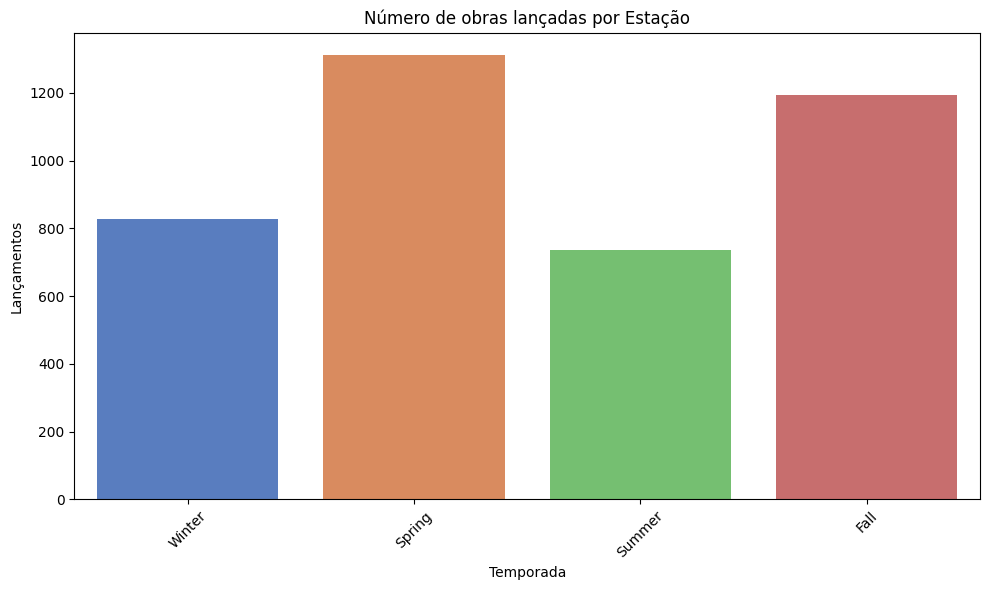

In [ ]:
#Animes lançados por temporada
ordem_estacoes = ['Winter', 'Spring', 'Summer', 'Fall']
seasonCounts = cpdf['Season'].value_counts().reindex(ordem_estacoes)

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonCounts.index, y=seasonCounts.values, palette='muted')
plt.xlabel('Temporada')
plt.ylabel('Lançamentos')
plt.title('Número de obras lançadas por Estação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Há claramente uma tendência a lançamentos de obras nas temporadas de primavera e outono. O ano fiscal no Japão iniciar em Abril significa uma verba maior para projetos na primavera. Além disso animes lançados no final do ano na temporada de outono podem visam alavancar vendas com épocas festivas.

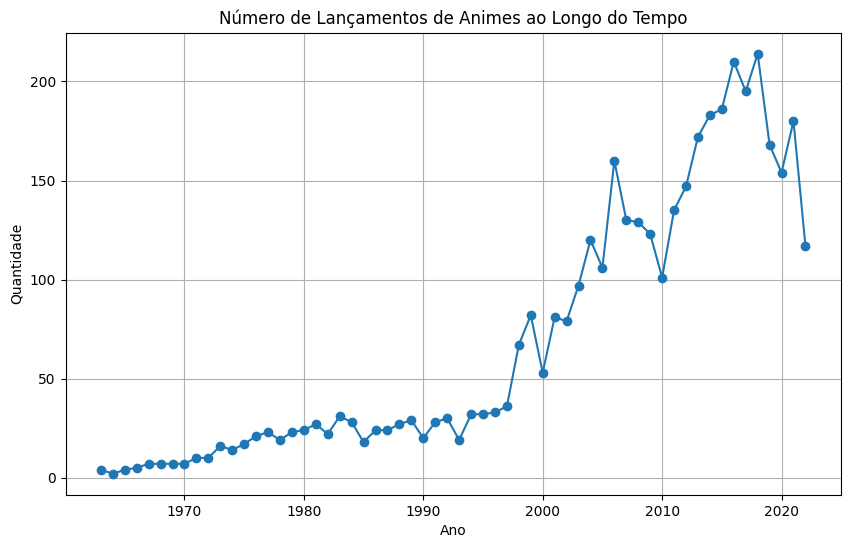

In [ ]:
#Cast Ano string para numérico Integer
cpdf['Year'] = pd.to_numeric(cpdf['Year'], errors='coerce')
yearCounts = cpdf['Year'].value_counts().sort_index()

#Quantidade de lançamentos de anime a cada ano
yearCounts.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Número de Lançamentos de Animes ao Longo do Tempo')
plt.grid(True)
plt.show()

Pode-se analizar claramente um crescimento nas produções com o decorrer do tempo, com ressalva para alguns anos que tiveram diminuição nos lançamentos(2000,2010,2019), mas que logo foram recuperados. O último ano do dataset apresenta queda por estar incompleto, sem os animes que seriam publicados na temporada de outono de 2022.

###Frequência de Gêneros

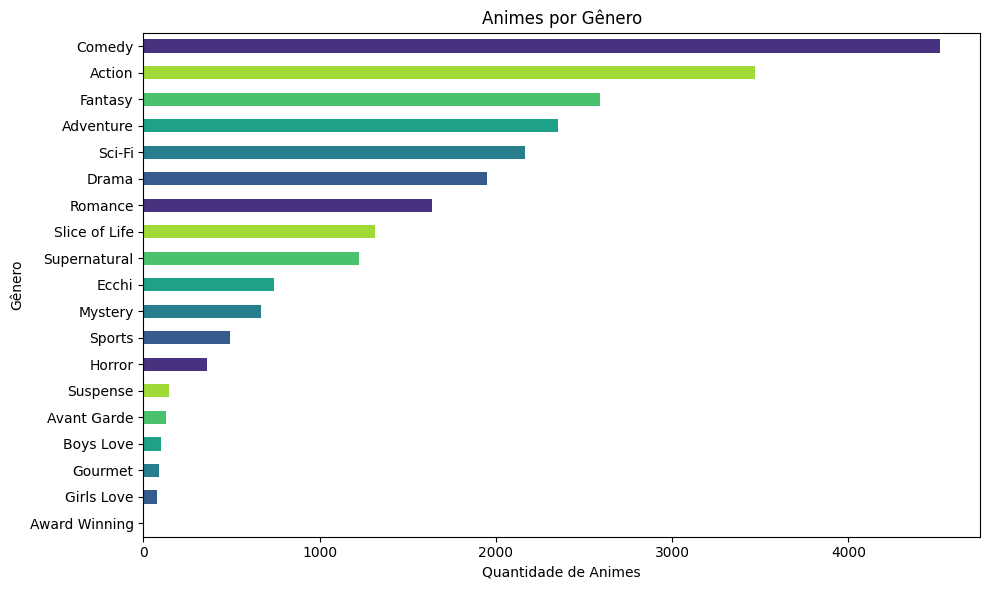

In [ ]:
#Para cada gênero único verifica em quantos animes ele está presente
cpdf = df.copy()
genreCounts = {}
for genre in generos_unicos:
  genreCounts[genre] = cpdf[cpdf['Genres'].str.contains(genre, na=False)].shape[0]
genero_series = pd.Series(genreCounts).sort_values(ascending=False)


cores = sns.color_palette('viridis')
genero_series.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    title='Animes por Gênero',
    color = cores
)
plt.xlabel('Quantidade de Animes')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

###Comparação de popularidade com rank
* Popularidade - Quantidade de pessoas que assitiram/pretendem assistir
* Rank - Baseado nas notas de análises

As notas são calculadas seguindo a fórmula:

(v / (v + m)) * S + (m / (v + m)) * C

- S = nota média
- v = número de usuários que deram nota
- m = número min. de usuários para calcular o score
- C = score médio da plataforma

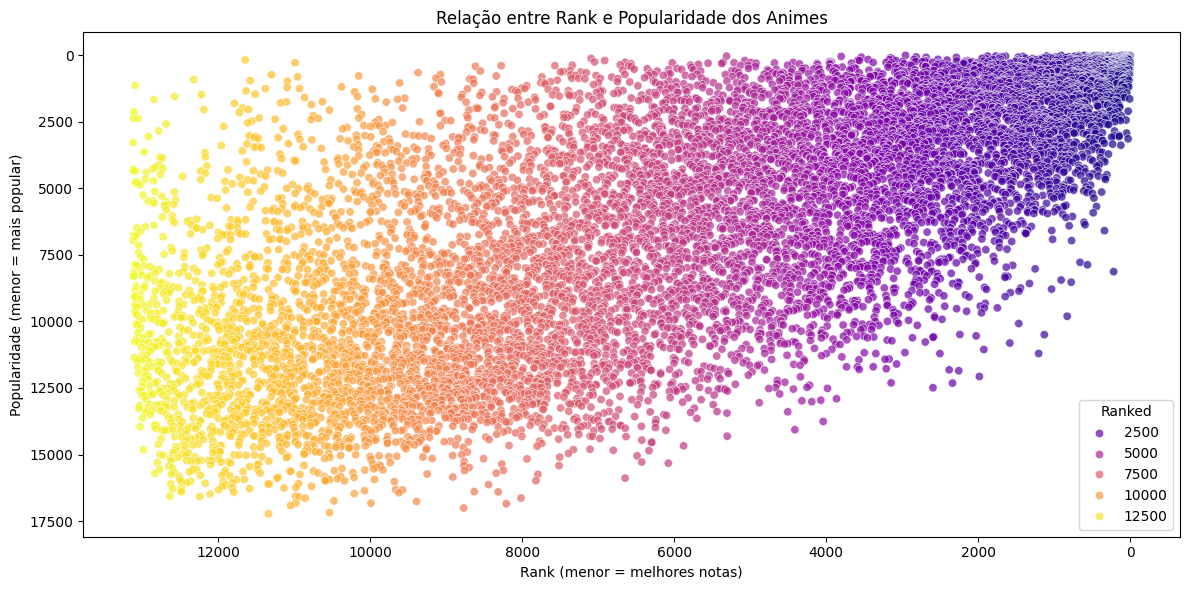

In [ ]:
#Comparação de rank e popularidade
cpdf = df[['Ranked','Popularity']].copy()

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=cpdf,
    x='Ranked',
    y='Popularity',
    hue='Ranked',
    palette='plasma',
    alpha=0.7
)
plt.title('Relação entre Rank e Popularidade dos Animes')
plt.xlabel('Rank (menor = melhores notas)')
plt.ylabel('Popularidade (menor = mais popular)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Rank e popularidade estão de fato relacionados, quanto maior o rank geralmente mais popular, contudo é observado uma facilidade em se obter uma posição melhor na popularidade comparada ao rank. A presença de outliers controversos, alta popularidade e nota não tão alta, é maior.

In [ ]:
#Seleciona os 10 primeiros animes com rank < 100 mas com popularidade > 1000
hiddenGems = df[
    (df['Ranked'] < 100) &
    (df['Popularity'] > 1000)
].copy()

hiddenGems = hiddenGems[['Title', 'Ranked', 'Popularity', 'Score']]
hiddenGems = hiddenGems.sort_values(by='Ranked')
hiddenGems.head(10)

Title  Ranked  Popularity  \
1607                                 Gintama: The Final       7        1641   
1167   Gintama.: Shirogane no Tamashii-hen - Kouhan-sen      20        1188   
2045                                 Kingdom 3rd Season      27        2103   
2991                                 Kingdom 4th Season      28        3138   
1074                Gintama.: Shirogane no Tamashii-hen      29        1092   
1149  Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...      41        1169   
1390                             Cyberpunk: Edgerunners      44        1419   
2795                                    Ashita no Joe 2      48        2925   
2352                         Mo Dao Zu Shi: Wanjie Pian      55        2434   
1185                            Natsume Yuujinchou Roku      69        1206   

      Score  
1607  9.051  
1167  8.891  
2045  8.821  
2991  8.821  
1074  8.811  
1149  8.741  
1390  8.731  
2795  8.711  
2352  8.671  
1185  8.631

In [ ]:
#Seleciona os 10 primeiros animes com rank > 1000 mas com popularidade < 100
duvidosos = df[
    (df['Ranked'] > 1000) &
    (df['Popularity'] < 100)
].copy()

duvidosos = duvidosos[['Title', 'Ranked', 'Popularity', 'Score']]
duvidosos = duvidosos.sort_values(by='Popularity')
duvidosos.head(10)

Title  Ranked  Popularity  Score
4           Sword Art Online    2956           5  7.201
27            Akame ga Kill!    1769          29  7.471
29         Nanatsu no Taizai    1100          31  7.701
30          Mirai Nikki (TV)    1877          32  7.441
31       Sword Art Online II    5311          33  6.701
34            Ao no Exorcist    1640          36  7.511
43            Tokyo Ghoul √A    3803          45  7.031
44                Fairy Tail    1412          46  7.581
50                   Another    1693          52  7.491
60  One Punch Man 2nd Season    1717          62  7.481

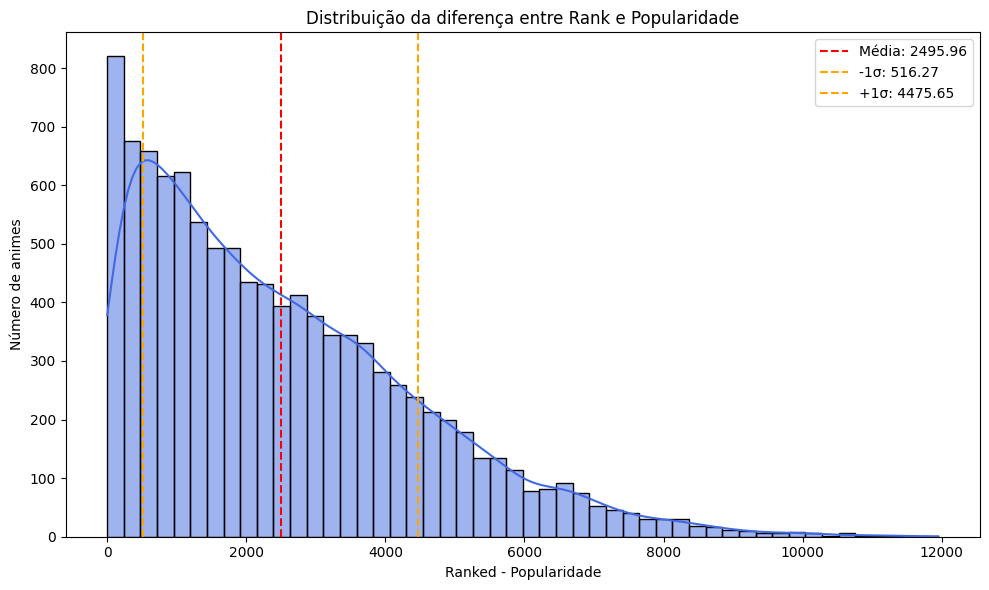

In [ ]:
#Diferença entre posição no rank e posição na popularidade
diff = df[['Ranked', 'Popularity']].copy()
diff['RankVSPop'] = (diff['Ranked'] - diff['Popularity']).abs()
media = diff['RankVSPop'].mean()
desvio = diff['RankVSPop'].std()

plt.figure(figsize=(10, 6))
sns.histplot(diff['RankVSPop'].dropna(), bins=50, kde=True, color='royalblue')
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(media - desvio, color='orange', linestyle='--', linewidth=1.5, label=f'-1σ: {(media - desvio):.2f}')
plt.axvline(media + desvio, color='orange', linestyle='--', linewidth=1.5, label=f'+1σ: {(media + desvio):.2f}')
plt.title('Distribuição da diferença entre Rank e Popularidade')
plt.xlabel('Ranked - Popularidade')
plt.ylabel('Número de animes')
plt.legend()
plt.tight_layout()
plt.show()

A distribuição apresenta uma cauda longa a direita. A maioria dos animes tem ranking e popularidade relativamente próximos. No entanto, há uma quantidade considerável que não.

###Distribuição da demografia dos 10 temas mais frquentes
Os termos da demografia dos animes tem origem no público alvo das revistas de mangá, sendo estes:

*   Josei - Significa "mulher"em japonês. Normalmente uma versão mais madura de um shoujo. (Ex.: Diabolik Lovers, Paradise Kiss, Usagi Drop)
*   Kids - Infantil.(Ex.: Pokemon, Digimon, Beyblade)
*   Seinen - Significa "Jovem adulto". Lida com temas mais pesados. (Ex: Beserk, Tokyo Ghoul, Hellsing)
*   Shoujo - Significa "menina"em japonês. Tem temas comuns ao publico feminino. (Ex: Sailor Moon, Sakura Card Captors, No.6 )
*   Shounen - Significa "menino" em japonês. Tem temas comuns ao publico masculino. (Ex.: Naruto, Attack on Titan, Death note)

Unknown consiste nos animes sem dados sobre demografia.



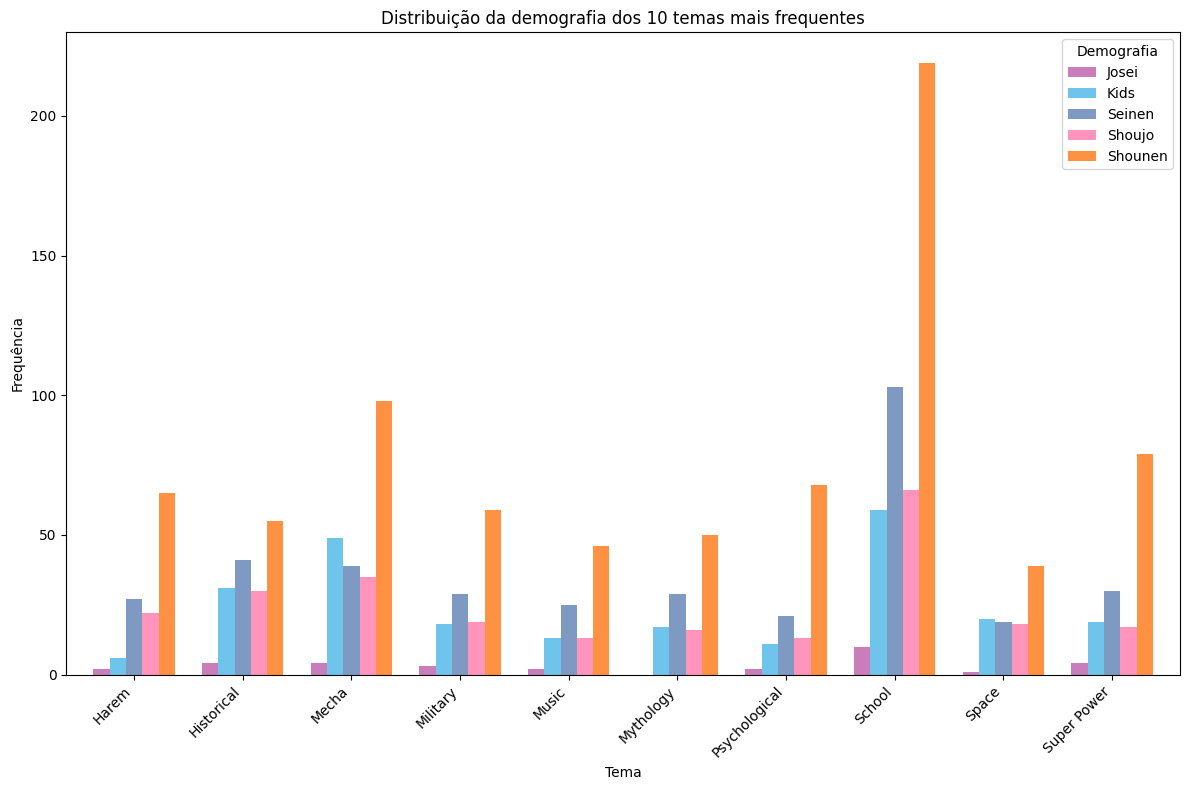

In [ ]:
demo_colors = [
    '#C97EBB',
    '#6EC4EA',
    '#7F9AC2',
    '#FF94BC',
    '#FF9242'
]

df_theme_demo = df[['Themes', 'Demographics']].dropna().copy()
df_theme_demo['Themes'] = df_theme_demo['Themes'].str.split(', ').explode('Themes')
df_theme_demo['Demographics'] = df_theme_demo['Demographics'].str.split(', ').explode('Demographics')

#Retira temas e demografias desconhecidas, para melhor visualização do gráfico
df_theme_demo = df_theme_demo[df_theme_demo['Themes'] != 'Unknown']
df_theme_demo = df_theme_demo[df_theme_demo['Demographics'] != 'Unknown']

# Conta os temas, filtra os 10 mais frequentes e relaciona com a demografia
top_themes = df_theme_demo['Themes'].value_counts().head(10).index
df_top_theme_demo = df_theme_demo[df_theme_demo['Themes'].isin(top_themes)]
contingency_table = pd.crosstab(df_top_theme_demo['Themes'], df_top_theme_demo['Demographics'])

# Plot do grafico de barras agrupado
contingency_table.plot(kind='bar', figsize=(12, 8), width=0.75, color=demo_colors)
plt.title('Distribuição da demografia dos 10 temas mais frequentes')
plt.xlabel('Tema')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Demografia')
plt.tight_layout()
plt.show()

No tema "school", foram contabilizados mais animes do tipo seinen(ou seja, com o público-alvo de homens adultos) do que shoujo(com o publico alvo feminino infanto-juvenil).

O tema mecha (robôs) é o segundo tema mais frequente na lista para crianças. (Ex.: Astroboy)

###Distribuição da Classificação Etária dos 10 temas mais frquentes

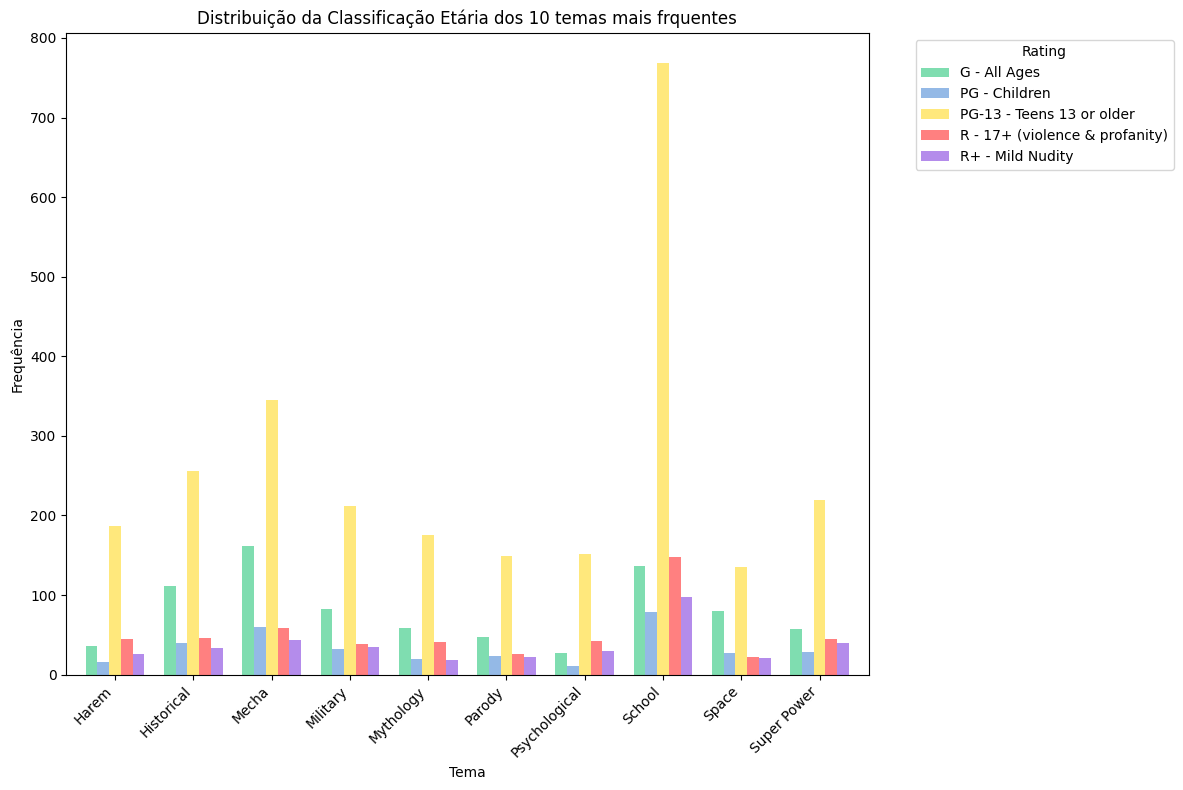

In [ ]:
#Foi feito um dicionário das cores de cada classificação para usar em outros gráficos
rating_colors_pastel = {
    'G - All Ages': '#7FDDB0',
    'PG - Children': '#94B9E6',
    'PG-13 - Teens 13 or older': '#FFE87C',
    'R - 17+ (violence & profanity)': '#FF8080',
    'R+ - Mild Nudity': '#B48CEB',
}


df_theme_rating = df[['Themes', 'Rating']].dropna().copy()
df_theme_rating['Themes'] = df_theme_rating['Themes'].str.split(', ').explode('Themes')
df_theme_rating = df_theme_rating[df_theme_rating['Themes'] != 'Unknown']

# Conta os temas, filtra os 10 mais frequentes e relaciona com a classificação etária
top_themes = df_theme_rating['Themes'].value_counts().head(10).index
df_top_theme_rating = df_theme_rating[df_theme_rating['Themes'].isin(top_themes)]
contingency_table = pd.crosstab(df_top_theme_rating['Themes'], df_top_theme_rating['Rating'])

#Pega as cores do dicionário para colocar no
r_colors = [rating_colors_pastel[rating] for rating in contingency_table.columns]
# Plota o gráfico de barras
contingency_table.plot(kind='bar', figsize=(12, 8), width=0.75, color=r_colors)
plt.title('Distribuição da Classificação Etária dos 10 temas mais frquentes')
plt.xlabel('Tema')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Percebe-se que a maioria dos temas dos animes são para o público adolescente.

###Distribuição da Classificação Etária Entre os Top 100 Animes

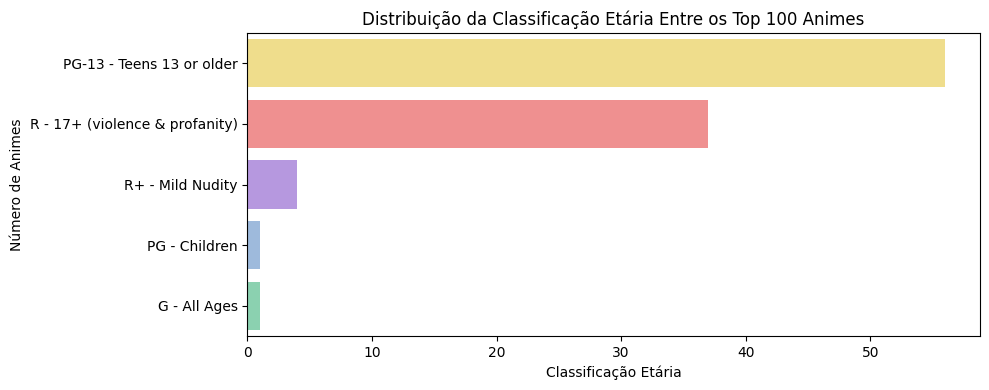

In [ ]:
# Pega os top X mais populares
popular_threshold = 100
df_popular = df[df['Popularity'] <= popular_threshold]

# Conta os animes por rating
pop_count_by_rating = df_popular['Rating'].value_counts().sort_values(ascending=False)

# Plot do gráfico de barras horizontais entre classificação x nº de animes
plt.figure(figsize=(10, 4))
sns.barplot(x = pop_count_by_rating.values, y = pop_count_by_rating.index,
            palette=[rating_colors_pastel.get(r, '#cccccc') for r in pop_count_by_rating.index],
            hue=pop_count_by_rating.index, legend=False)
plt.title(f'Distribuição da Classificação Etária Entre os Top {popular_threshold} Animes')
plt.ylabel('Número de Animes')
plt.xlabel('Classificação Etária')
plt.tight_layout()
plt.show()


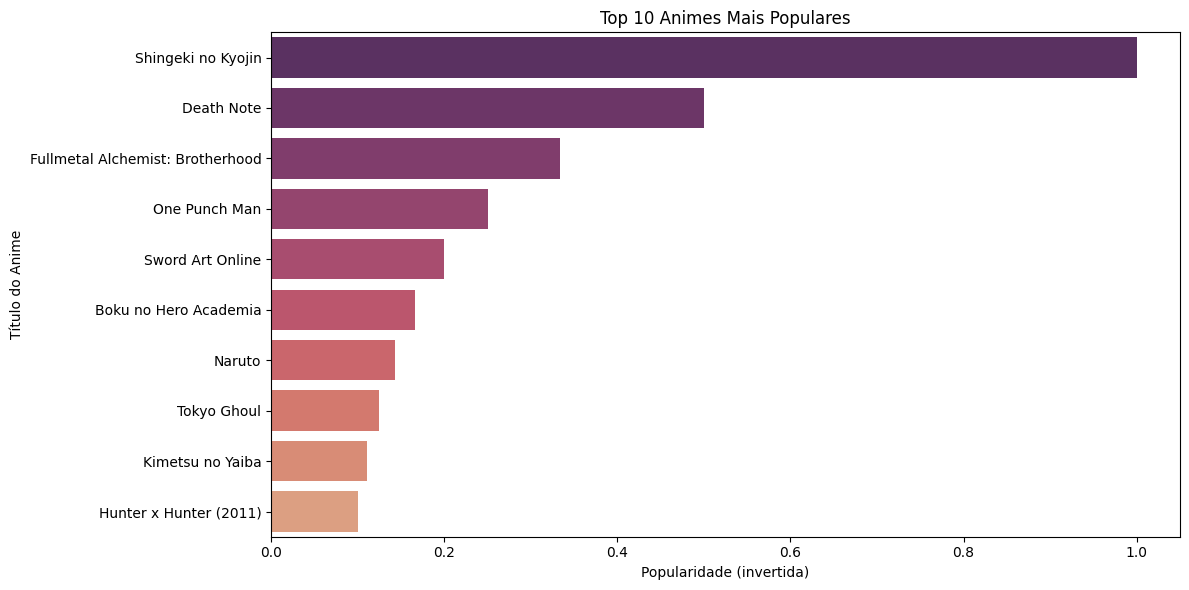

In [ ]:
top_animes = df.sort_values('Popularity').head(10)

# Inverte a popularidade para melhor visualização do gráfico
top_animes['Popularidade Inversa'] = 1 / top_animes['Popularity']

# Gráfico de barras horizontais para os títulos de animes e sua popularidade
plt.figure(figsize=(12, 6))
sns.barplot( data=top_animes, x='Popularidade Inversa', y='Title', palette='flare_r',
            hue='Title', legend=False)

plt.title('Top 10 Animes Mais Populares')
plt.xlabel('Popularidade (invertida)')
plt.ylabel('Título do Anime')
plt.tight_layout()
plt.show()


Dos 10 animes mais populares, 2 foram publicados pela revista Seinen Young Jump, sendos estes 'One Punch Man' e 'Tokyo Ghoul'. Todos os outros da lista são animes Shonen.

### Rank médio por gênero

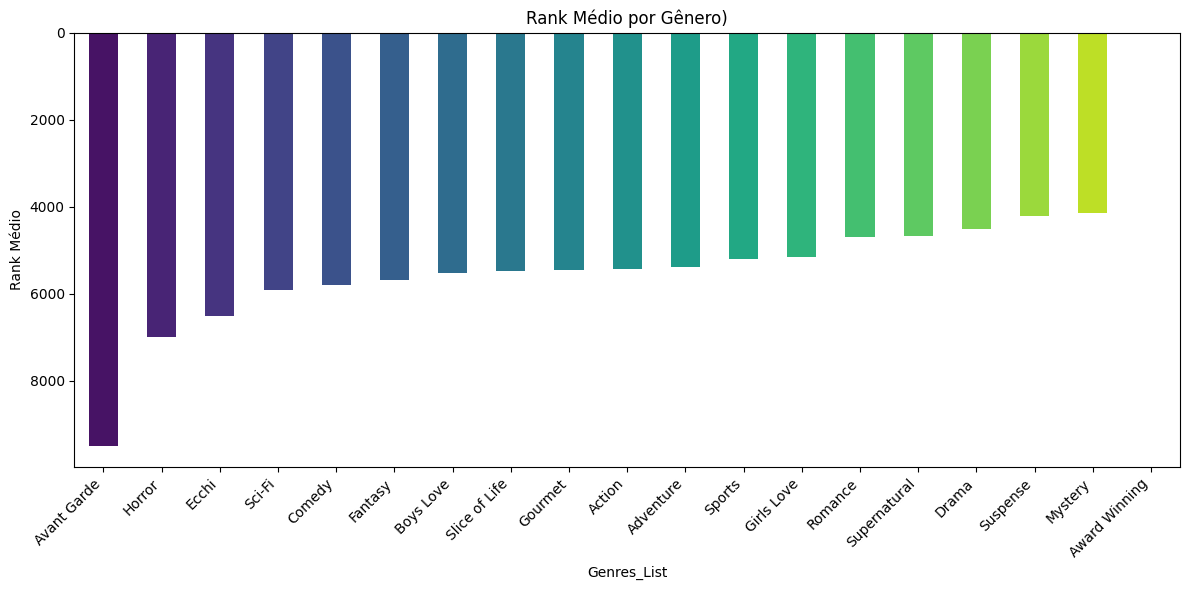

In [ ]:
#Rank médio por gênero
cpdf = df.copy()

cpdf = cpdf.dropna(subset=['Genres', 'Ranked'])
cpdf['Genres_List'] = cpdf['Genres'].str.split(',')
cpdf['Genres_List'] = cpdf['Genres_List'].apply(lambda x: [g.strip() for g in x])
exploded = cpdf.explode('Genres_List')

media_gen = exploded.groupby('Genres_List')['Ranked'].mean().sort_values(ascending=False)
palette = sns.color_palette('viridis', n_colors=len(media_gen))

plt.figure(figsize=(12,6))
media_gen.plot(kind='bar', color=palette)
plt.ylabel('Rank Médio')
plt.title('Rank Médio por Gênero')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Popularidade média por tipo

/tmp/ipython-input-419-2896070972.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, media_tip[i] + 100, str(v), ha='center', fontweight='bold')


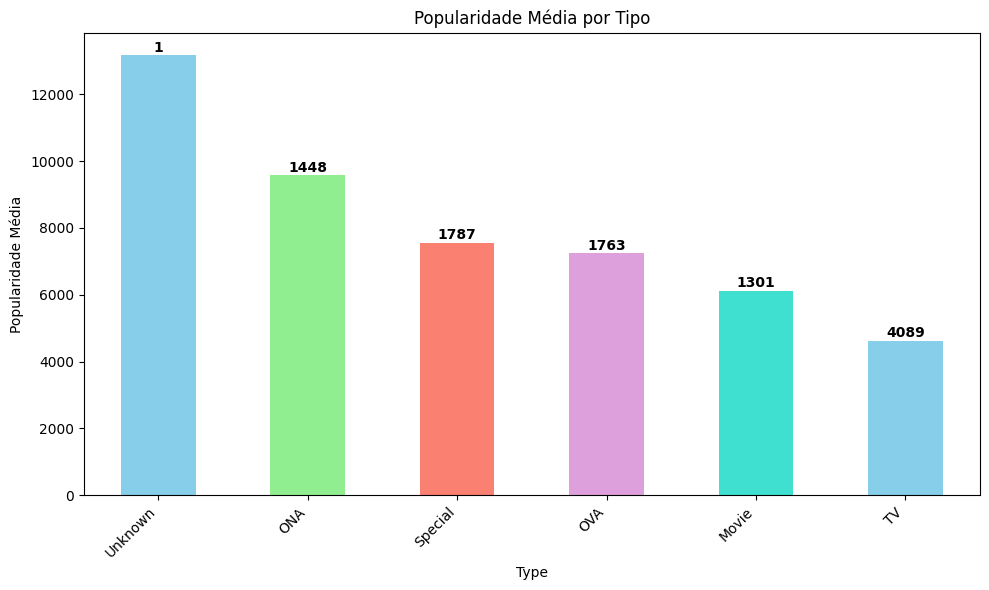

ID                Title Synonyms Japanese  \
9810  7398  Sekai Meisaku Douwa  Unknown   世界名作童話   

                             English  \
9810  World Famous Fairy Tale Series   

                                               Synopsis     Type  Episodes  \
9810  Another of Toei's World Famous Fairy Tale seri...  Unknown      20.0   

               Status Start_Aired  ...   Themes Demographics Duration_Minutes  \
9810  Finished Airing    Oct 1975  ...  Unknown      Unknown             10.0   

            Rating  Score Scored_Users Ranked Popularity Members Favorites  
9810  G - All Ages  6.071        142.0   8696      13181     652         2  

[1 rows x 28 columns]

In [ ]:
# Média de popularidade por tipo
media_tip = df.groupby('Type')['Popularity'].mean()

media_tip = media_tip.sort_values(ascending=False)

# Quantidade de itens por tipo
contagem = df['Type'].value_counts().reindex(media_tip.index)

plt.figure(figsize=(10,6))
ax = media_tip.plot(kind='bar', color=colors)

# Colocar os valores da contagem no topo
for i, v in enumerate(contagem):
    ax.text(i, media_tip[i] + 100, str(v), ha='center', fontweight='bold')

plt.ylabel('Popularidade Média')
plt.title('Popularidade Média por Tipo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df.loc[df['Type'] == 'Unknown']

### Popularidade média por "Demographics"

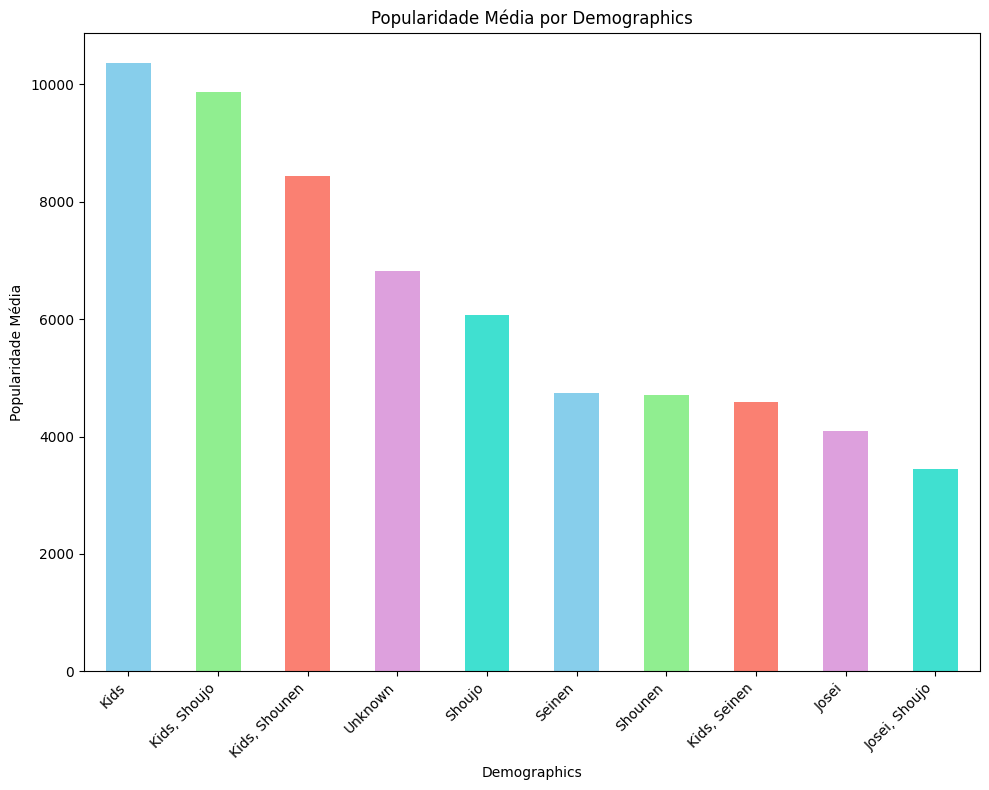

In [ ]:
# Média de popularidade por Demographics
media_pop = df.groupby('Demographics')['Popularity'].mean()

media_pop = media_pop.sort_values(ascending=False)

media_pop.plot(kind='bar', figsize=(10, 8), color=colors)

plt.ylabel('Popularidade Média')
plt.title('Popularidade Média por Demographics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Obras por studio


In [ ]:
#Separa os estúdios produtores e desconsidera 'Unkown'
studiodf = df[['Studios','Popularity']].copy()
studiodf = studiodf[studiodf['Studios'] != 'Unknown']
studiodf['Studios'] = studiodf['Studios'].str.split(', ').explode('Studios')
studiodf = studiodf.dropna()

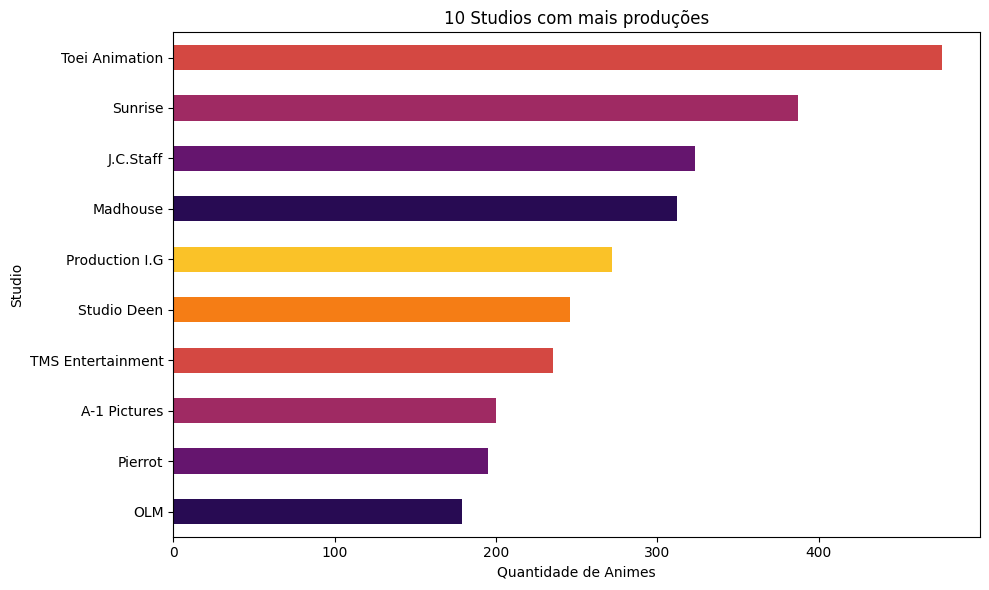

In [ ]:
#Seleciona os 10 estúdios que mais publicaram
cores = sns.color_palette('inferno')
studioCounts = studiodf['Studios'].value_counts().sort_values(ascending=False)
studioCounts = studioCounts.head(10)
studioCounts.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    title='10 Studios com mais produções',
    color = cores
)
plt.xlabel('Quantidade de Animes')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

/tmp/ipython-input-423-78163051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


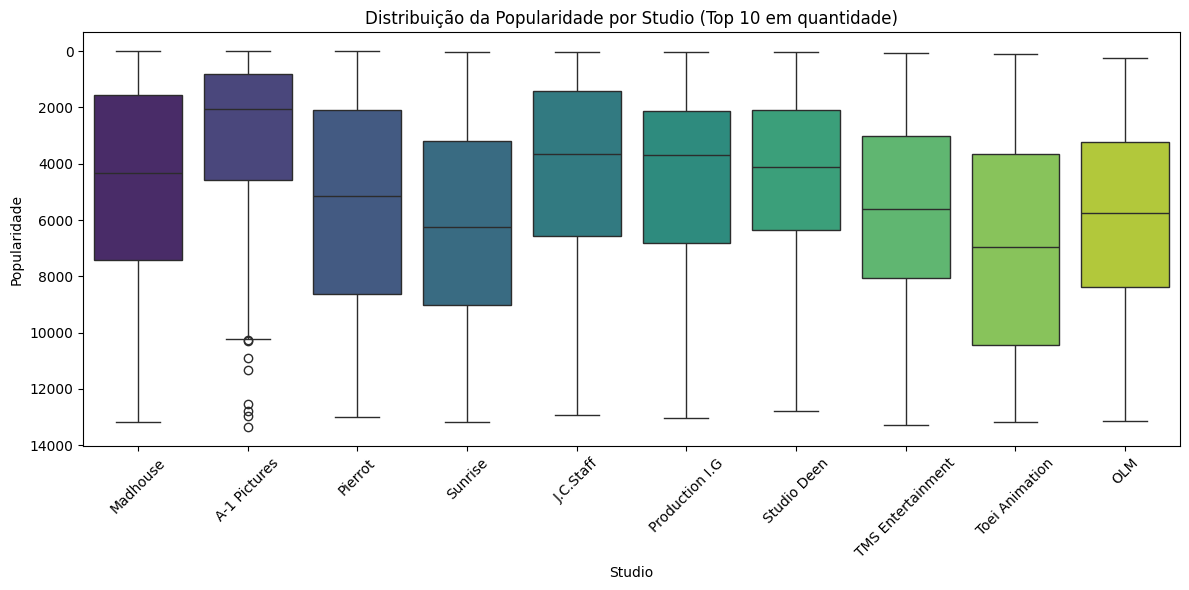

In [ ]:
#Popularidade dos animes dos 10 maiores studios
top_studios = studiodf['Studios'].value_counts().head(10).index
studiodf_top = studiodf[studiodf['Studios'].isin(top_studios)]
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=studiodf_top,
    x='Studios',
    y='Popularity',
    palette='viridis'
)
plt.title('Distribuição da Popularidade por Studio (Top 10 em quantidade)')
plt.ylabel('Popularidade')
plt.xlabel('Studio')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Pode-se inferir que a quantidade de obras lançadas por um estúdio não estão relacionadas com a popularidade. Todos os maiores estúdios tem obras famosas e pouco aclamadas.

### Tempo de vida por gênero

/tmp/ipython-input-424-3583843112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpdf['delta_time'] = (cpdf['de'] - cpdf['ds']).dt.days
/tmp/ipython-input-424-3583843112.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpdf['Genres_List'] = cpdf['Genres'].str.split(',').apply(lambda x: [g.strip() for g in x])
/tmp/ipython-input-424-3583843112.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `leg

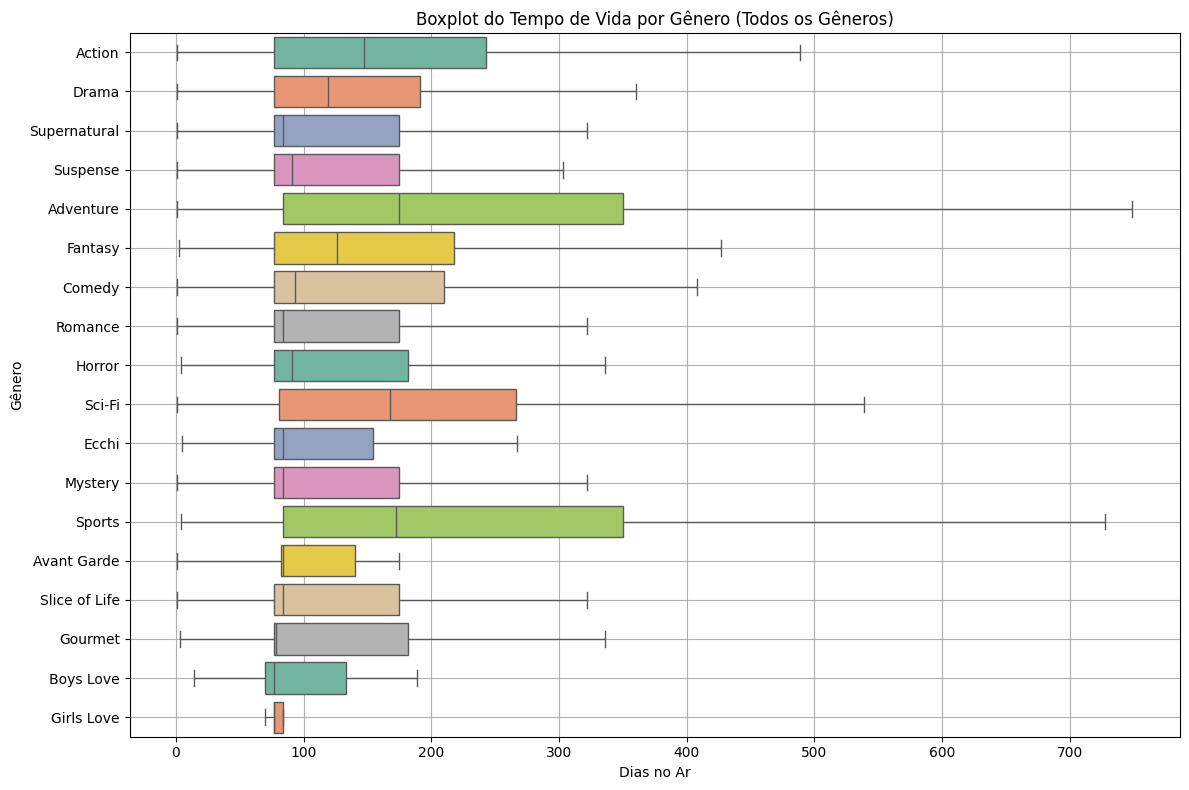

In [ ]:
#Pega a data de estreia e a data de finalização
cpdf = df.copy()
cpdf['ds'] = pd.to_datetime(cpdf['Start_Aired'], format='%b %d, %Y', errors='coerce')
cpdf['de'] = pd.to_datetime(cpdf['End_Aired'], format='%b %d, %Y', errors='coerce')
cpdf = cpdf.dropna(subset=['ds', 'de'])
#Calcula o tempo que um anime levou pra ser publicado por gênero
cpdf['delta_time'] = (cpdf['de'] - cpdf['ds']).dt.days
cpdf['Genres_List'] = cpdf['Genres'].str.split(',').apply(lambda x: [g.strip() for g in x])
exploded = cpdf.explode('Genres_List')


plt.figure(figsize=(12, 8))
sns.boxplot(
    data=exploded,
    x='delta_time',
    y='Genres_List',
    orient='h',
    showfliers=False,
    palette='Set2'
)

plt.title('Boxplot do Tempo de Vida por Gênero (Todos os Gêneros)')
plt.xlabel('Dias no Ar')
plt.ylabel('Gênero')
plt.grid(True)
plt.tight_layout()
plt.show()

### Correlação de atributos numéricos

Text(0.5, 1.0, 'Correlação de atributos numéricos')

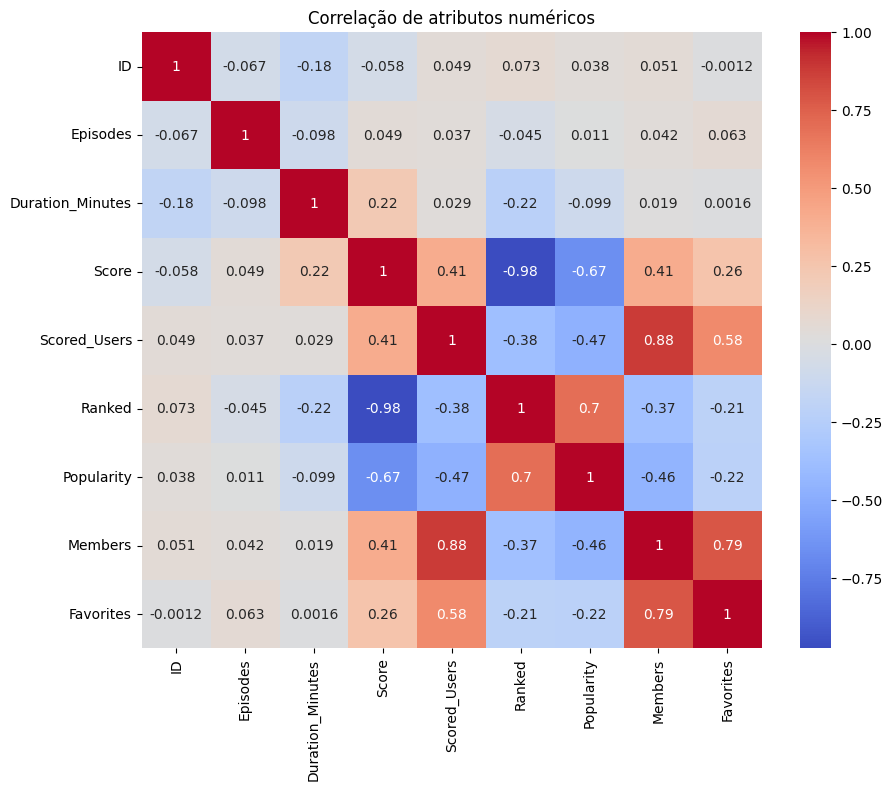

In [ ]:
df_numerico = df.select_dtypes(include='number')
corr = df_numerico.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação de atributos numéricos')

### Quantidade de animes por origem

As origens (source) de um anime nesta base de dados englobam: Manga, Web manga, Light novel, Visual novel, Original, Novel, 4-koma manga, Game, Music, Mixed Media, Other, Card game, Web novel, Book, Picture book, Unknown e Radio

In [ ]:
# Para análise, filtra fontes desconhecidas e outras
filtro_source = (df['Source'] != 'Unknown') & (df['Source'] != 'Other')
df_sources = df.loc[filtro_source]

# Contagem de animes por origem
contagem_source = df_sources['Source'].value_counts().sort_values(ascending=True)

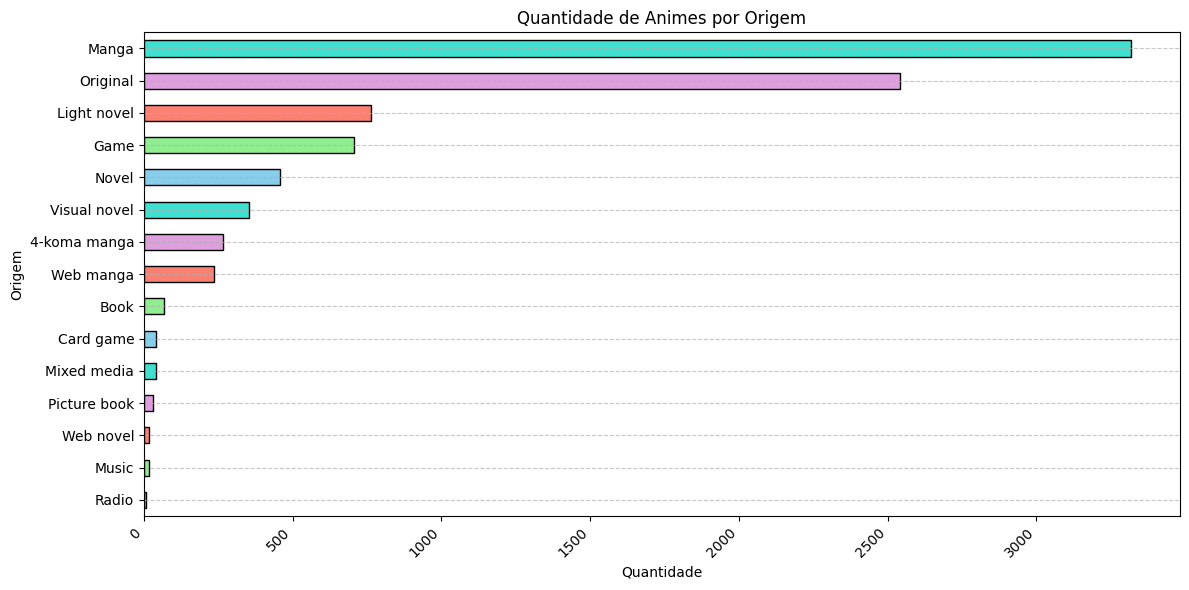

In [ ]:
plt.figure(figsize=(12,6))
contagem_source.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Quantidade de Animes por Origem')
plt.xlabel('Quantidade')
plt.ylabel('Origem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- A origem que predomina entre os animes é a de 'Manga', seguida de 'Original' e 'Light novel'.
- Enquanto 'Web novel', 'Music' e 'Radio' apresentam as menores predominâncias.

### Popularidade por origem

In [ ]:
# Calcula popularidade média por origem
popularidade_media = df_sources.groupby('Source')['Popularity'].mean().reset_index()
popularidade_media = popularidade_media.sort_values(by='Popularity', ascending=True)

/tmp/ipython-input-429-4261848960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularidade_media, x='Popularity', y='Source', palette='Set2')


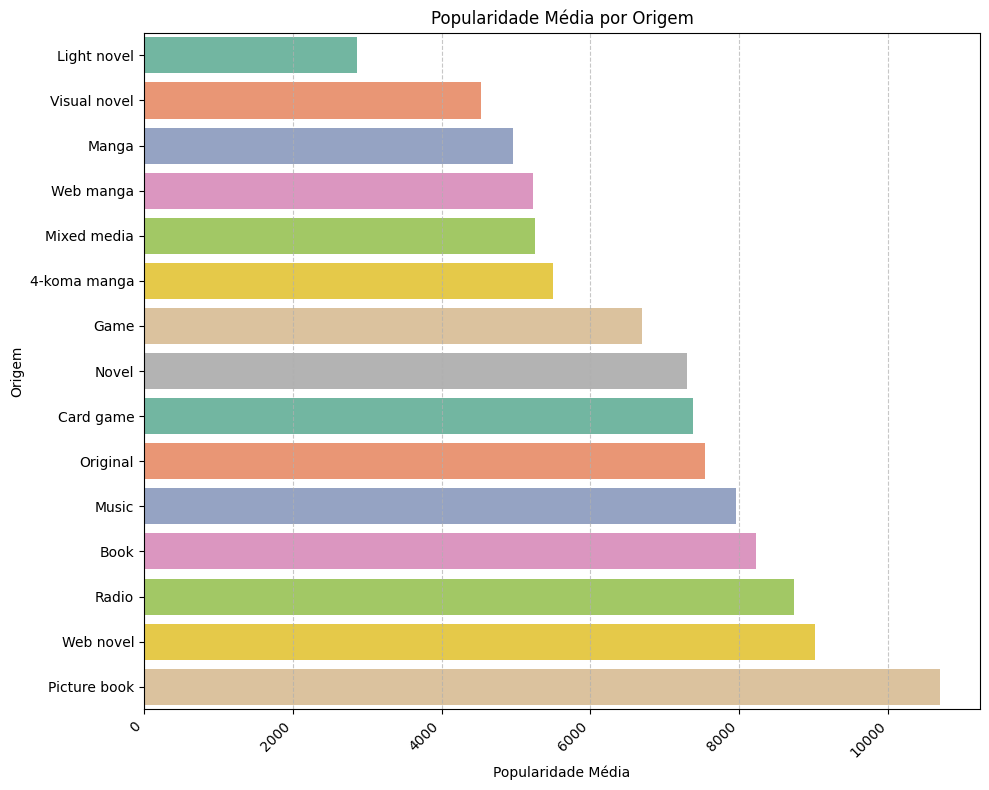

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=popularidade_media, x='Popularity', y='Source', palette='Set2')

plt.title('Popularidade Média por Origem')
plt.xlabel('Popularidade Média')
plt.ylabel('Origem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


- A popularidade média por origem melhor é a de 'Light novel', apesar de a maior quantidade de animes originarem de 'Manga'.
- 'Manga', que possui a maior quantidade de animes, aparece como 3ª melhor origem com popularidade média. O que indica que não é porque a maioria dos animes se originam de 'Manga', que essa origem indica uma melhor popularidade.
- 'Mixed media' apresenta a 4ª melhor popularidade média, apesar de ser a 5ª menor origem.

/tmp/ipython-input-430-4241115243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sources, x='Popularity', y='Source', palette='Set2')


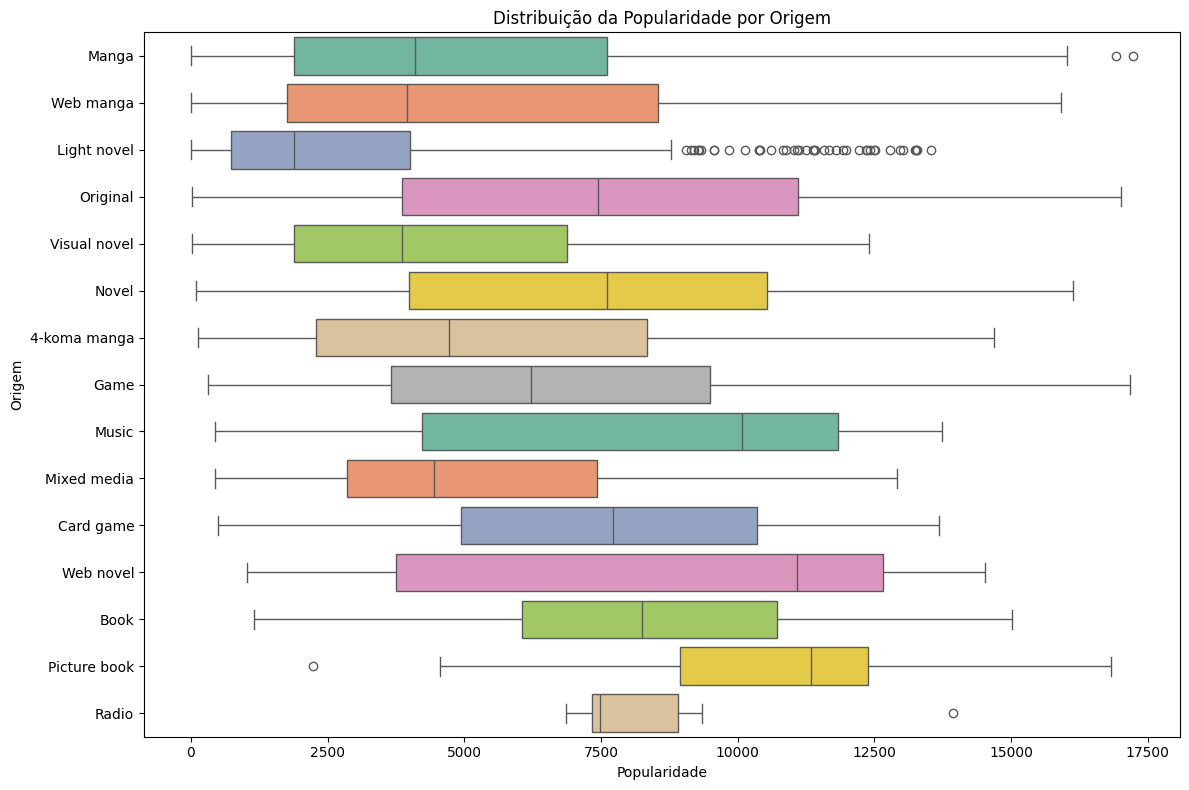

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_sources, x='Popularity', y='Source', palette='Set2')

plt.title('Distribuição da Popularidade por Origem')
plt.xlabel('Popularidade')
plt.ylabel('Origem')
plt.tight_layout()
plt.show()


- 'Picture book', que apresenta a pior popularidade média, possui apenas um outlier inferior, é possível observar a mediana mais próxima do 3° quartil.
- É possível observar uma assimetria à esquerda em 'Music'.
- 'Manga' apresenta uma assimetria à direita e possui dois outliers superiores.
- 'Light novel' apresenta muitos outliers superiores e entre todas as origens é a que tem o menor valor para popularidade para 75% dos seus animes.
- 'Radio' possui um intervalo interquartil bem menor em comparação aos outros, o que indica um baixa dispersão dos dados nessa origem.

### Favoritos por origem

In [ ]:
# Calcula favoritismo médio por origem
favoritos_media = df_sources.groupby('Source')['Favorites'].mean().reset_index()
favoritos_media = favoritos_media.sort_values(by='Favorites', ascending=False)

/tmp/ipython-input-432-3757349193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=favoritos_media, x='Favorites', y='Source', palette='Set2')


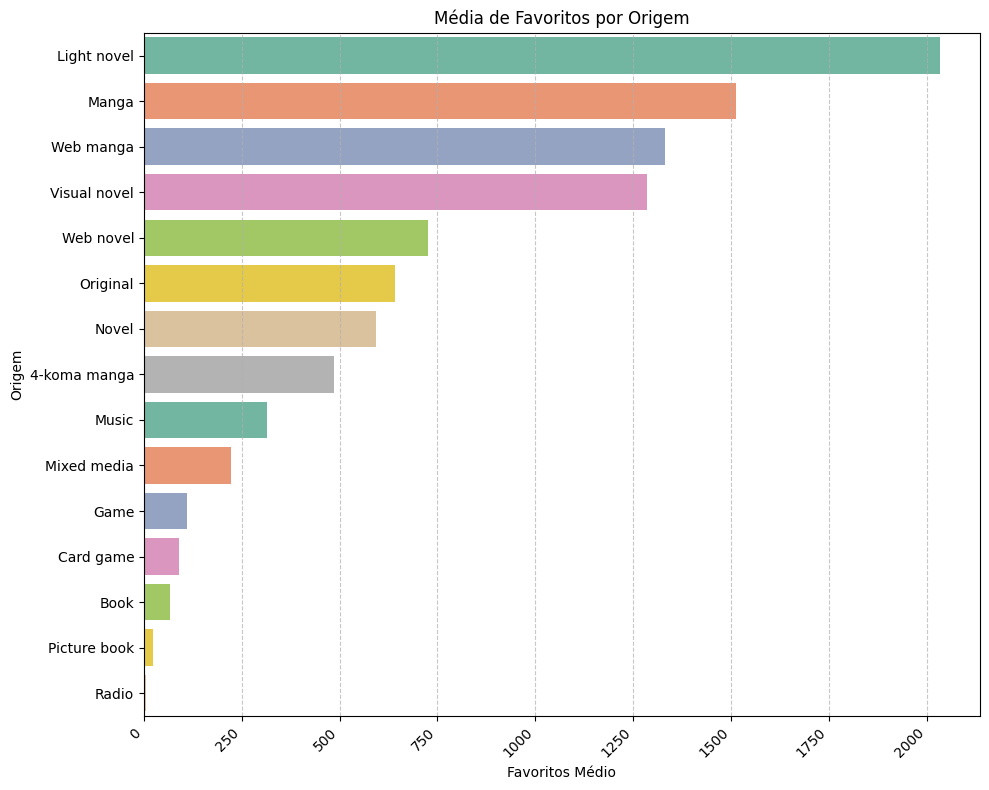

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=favoritos_media, x='Favorites', y='Source', palette='Set2')

plt.title('Média de Favoritos por Origem')
plt.xlabel('Favoritos Médio')
plt.ylabel('Origem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- 'Light novel' apresenta a maior média de favoritos entre as origens, enquanto 'Radio' é a menor com 8.5
- Em comparação à análise anterior, percebe-se que uma melhor popularidade média, implica em uma média de favoritos mais alta. Isso porque, por exemplo, temos 'Light novel' com maior popularidade média e maior favoritismo médio.
- Também há casos, como o de 'Original' em que estava no centro entre as origens mais populares, e está 2 posições acima em favoritismo médio.

### Ranking por origem

/tmp/ipython-input-433-1390555968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sources, x='Ranked', y='Source', palette='Set2')


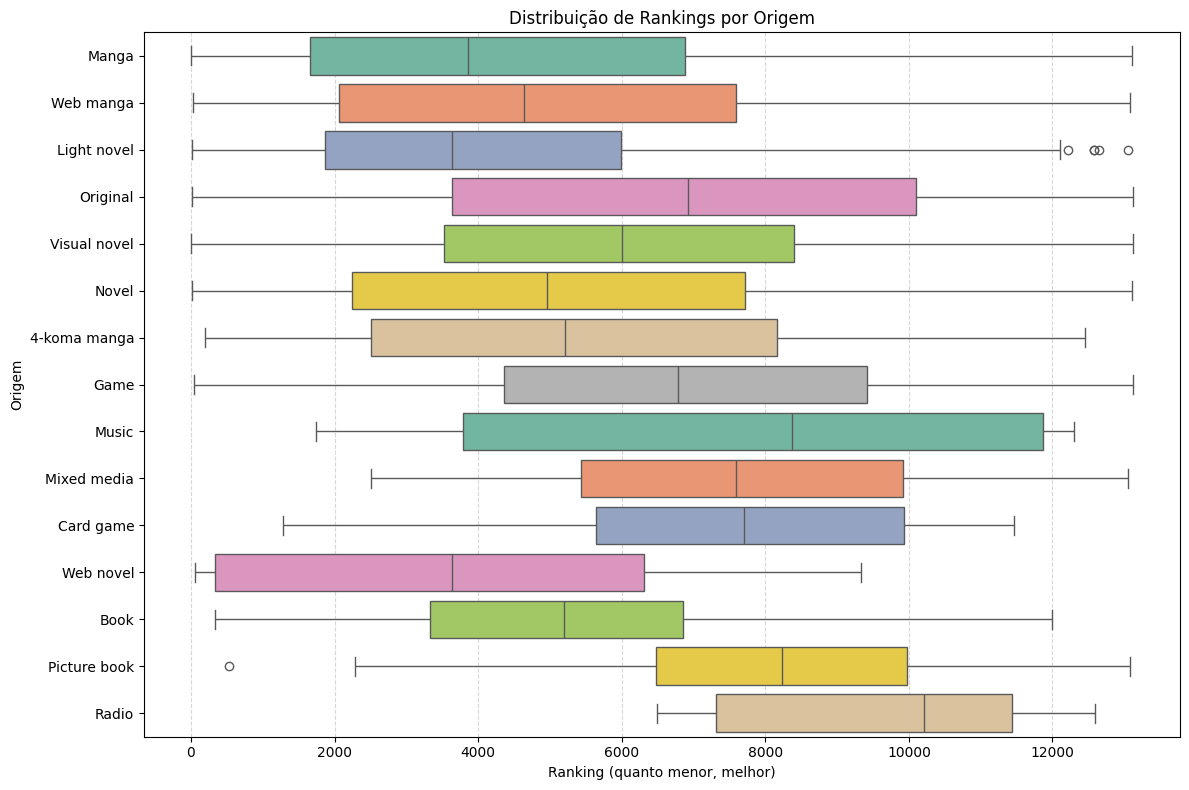

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_sources, x='Ranked', y='Source', palette='Set2')
plt.title('Distribuição de Rankings por Origem')
plt.xlabel('Ranking (quanto menor, melhor)')
plt.ylabel('Origem')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Apenas 'Light novel' e 'Picture book' apresentam outliers maiores que o valor máximo de ranking e as outras origens estão dentro dos limites considerados normais para a distribuição de rankings.
- Animes de origem 'Radio' possuem rankings mais concentrados em um intervalo específico, apresentando valores mínimo e máximo bem próximo dos quartis, em comparação com as outras origem.
- 'Web novel' representa a origem de anime com melhores rankings. Em comparação com o gráfico anterior, observa-se que uma maior média de favoritismo não indica um ranking melhor.
- 'Music' sugere uma assimetria à esquerda, e apesar de um ranking mais concentrado para os valores maiores, apresenta uma média de favoritismo maior que outras 6 fontes. O que se evidencia novamente a observação feita no item anterior.

## Conclusão


A análise exploratória dos dados de animes até 2022 mostrou insights sobre o sucesso e popularidade de um anime e a relação com gênero, tema, mídias derivadas, e outros.

Como sugestões para pesquisas futuras, poderia ser feito o cruzamento dos dados dessa base com os de uma plataforma de streaming Crunchyroll ou Netflix e a verificação futura se as tendências observadas são as mesmas ou se sofreram alterações. Por exemplo se os gêneros e temáticas mais populares ainda são os mesmos, se o lançamento de novas obras continua aumentando ou o público-alvo principal da indústria mudou. Também pode-se tentar analisar a percepção das pessoas em relação a um anime com o passar do tempo.

![Gif da Equipe Rocket sumindo](https://3.bp.blogspot.com/-Usm1mayrQK8/Wm8tpchcgpI/AAAAAAAAAnk/94x0ii1b-G4EeL5UWfjSicQat3bUfzG3wCLcBGAs/s320/9u9wIpW.gif "Equipe Rocket sumindo")
